<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%982_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/pymlrev2/

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target)

In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')

In [ ]:
vo.fit(x_train,y_train)
pred = vo.predict(x_test)

In [ ]:
print("acc:",accuracy_score(y_test,pred))

acc: 0.9230769230769231


In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

LogisticRegression ===
acc: 0.916083916083916
KNeighborsClassifier ===
acc: 0.9230769230769231


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [ ]:
df['label'] = cancer.target

In [ ]:
df.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
label                      -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(cancer.data)
scaled_data = ss.transform(cancer.data)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 cancer.target)

In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')

In [ ]:
vo.fit(x_train,y_train)
pred = vo.predict(x_test)
print("acc:",accuracy_score(y_test,pred))

acc: 0.965034965034965


In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

LogisticRegression ===
acc: 0.958041958041958
KNeighborsClassifier ===
acc: 0.958041958041958


## 랜덤 포리스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dir_path = '/content/drive/MyDrive/UHD/'

In [ ]:
df = pd.read_csv(dir_path+'features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_dup_df = pd.DataFrame(data=df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
ndf = pd.merge(df.reset_index(), feature_dup_df, how='outer')
ndf['column_name'] = ndf[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] >0 else x[0] ,  axis=1)
ndf = ndf.drop(['index'], axis=1)
feature_name = ndf.iloc[:, 1].values.tolist()
x_train = pd.read_csv(dir_path+'train/X_train.txt',sep='\s+', names=feature_name )
x_test = pd.read_csv(dir_path+'test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv(dir_path+'train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(dir_path+'test/y_test.txt',sep='\s+',header=None,names=['action'])


In [ ]:
x_train.shape,x_test.shape

((7352, 561), (2947, 561))

In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
 2   dup_cnt       561 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.5+ KB


In [ ]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("acc:",accuracy_score(y_test,pred))

<ipython-input-55-0013b0ff8e28>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


acc: 0.9314557176789956


In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

LogisticRegression ===
acc: 0.9579233118425518
KNeighborsClassifier ===
acc: 0.9015948422124194


In [ ]:
ss = StandardScaler()
ss.fit(x_train)
scaled_xtr = ss.transform(x_train)
scaled_xte = ss.transform(x_test)

In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[vo,rf,lr,knn]
for model in models:
  model.fit(scaled_xtr,y_train)
  pred = model.predict(scaled_xte)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

VotingClassifier ===
acc: 0.9457074991516796


<ipython-input-62-adb67f1ba0df>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(scaled_xtr,y_train)


RandomForestClassifier ===
acc: 0.9300984051577876


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

LogisticRegression ===
acc: 0.9541907024092298
KNeighborsClassifier ===
acc: 0.8802171700033933


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth':[4,8,12,16,20],
    'min_samples_leaf':[1,4,10,15],
    'min_samples_split':[2,4,6,8]
}

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
gs = GridSearchCV(rf,param_grid=params)
gs.fit(x_train,y_train)
print("best:",gs.best_params_)
print("acc:",gs.best_score_)

In [ ]:
model = gs.best_estimator_

In [ ]:
pred = model.predict(x_test)

In [ ]:
print('acc:',accuracy_score(y_test,pred))

acc: 0.9239904988123515


In [ ]:
sd = pd.Series(model.feature_importances_)
sd.index = x_train.columns

In [ ]:
top20 = sd.sort_values(ascending=False)[:20]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

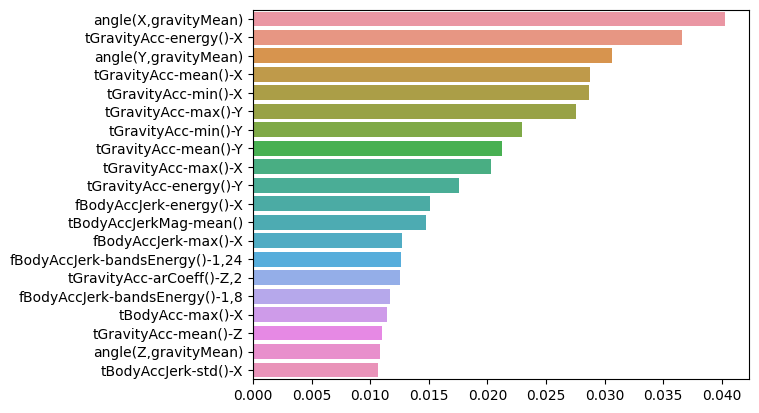

In [ ]:
sns.barplot(x=top20,y=top20.index)
plt.show()

## GBM

In [3]:
import pandas as pd

In [4]:
dir_path = '/content/drive/MyDrive/UHD/'

In [102]:
df = pd.read_csv(dir_path+'features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_dup_df = pd.DataFrame(data=df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
ndf = pd.merge(df.reset_index(), feature_dup_df, how='outer')
ndf['column_name'] = ndf[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] >0 else x[0] ,  axis=1)
ndf = ndf.drop(['index'], axis=1)
feature_name = ndf.iloc[:, 1].values.tolist()
x_train = pd.read_csv(dir_path+'train/X_train.txt',sep='\s+', names=feature_name )
x_test = pd.read_csv(dir_path+'test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv(dir_path+'train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(dir_path+'test/y_test.txt',sep='\s+',header=None,names=['action'])


In [7]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [8]:
gbs = GradientBoostingClassifier()
st = time.time()
gbs.fit(x_train,y_train)
et = time.time()
print("소요 시간:",et-st)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


소요 시간: 981.0391969680786


In [122]:
ytrm1 = y_train-1
ytem1 = y_test-1

In [123]:
model = XGBClassifier(n_estimators=400,
                      learning_rate = 0.1,
                      max_depth=3) #모델 생성
model.fit(x_train.values,ytrm1)
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]

In [124]:
print(accuracy_score(ytem1,pred))

0.9494401085850017


In [ ]:
print("acc:",accuracy_score(pred,y_test))

In [70]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)

In [83]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [104]:
lgbm = LGBMClassifier(n_estimators=400,
                      learning_rate = 0.05)
lgbm.fit(x_train.values,y_train)
pred = lgbm.predict(x_test.values)
pred_proba = lgbm.predict_proba(x_test.values)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [88]:
print("acc:",accuracy_score(pred,y_test))

acc: 0.9389209365456397


In [10]:
from sklearn.metrics import accuracy_score

In [11]:
pred = gbs.predict(x_test)
print("acc:",accuracy_score(pred,y_test))

acc: 0.9389209365456397


In [15]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [17]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target

In [ ]:
df = pd.DataFrame(data,
                  columns=cancer.feature_names)
df['target'] = label
df.head(3)

In [19]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [21]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)

In [22]:
y_tr.shape, y_val.shape, y_test.shape

((319,), (107,), (143,))

In [24]:
dtr = xgb.DMatrix(data=x_tr,label=y_tr)
dval = xgb.DMatrix(data=x_val,label=y_val)
dtest = xgb.DMatrix(data=x_test,label=y_test)

In [25]:
params = {
    'max_depth':3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds = 400

In [ ]:
eval_list =[(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params=params ,
                      dtrain = dtr,
                      num_boost_round = num_rounds,
                      early_stopping_rounds=50,
                      evals = eval_list)

In [42]:
pred_proba = xgb_model.predict(dtest)
pred = [1 if re>0.5 else 0 for re in pred_proba]
print(pred)

[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [44]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[47  5]
 [ 3 88]]
정확도: 0.9441, 정밀도: 0.9462, 재현율: 0.9670,    F1: 0.9565, AUC:0.9867


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [47]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models = [lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  pred_proba = model.predict_proba(x_test)[:,1]
  print(model.__class__.__name__)
  get_clf_eval(y_test,pred,pred_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
오차 행렬
[[48  4]
 [ 3 88]]
정확도: 0.9510, 정밀도: 0.9565, 재현율: 0.9670,    F1: 0.9617, AUC:0.9945
KNeighborsClassifier
오차 행렬
[[47  5]
 [ 3 88]]
정확도: 0.9441, 정밀도: 0.9462, 재현율: 0.9670,    F1: 0.9565, AUC:0.9672


In [48]:
from sklearn.preprocessing import StandardScaler

In [55]:
ss = StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)

In [56]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models = [lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  pred_proba = model.predict_proba(x_test)[:,1]
  print(model.__class__.__name__)
  get_clf_eval(y_test,pred,pred_proba)

LogisticRegression
오차 행렬
[[51  0]
 [ 1 91]]
정확도: 0.9930, 정밀도: 1.0000, 재현율: 0.9891,    F1: 0.9945, AUC:0.9991
KNeighborsClassifier
오차 행렬
[[47  4]
 [ 0 92]]
정확도: 0.9720, 정밀도: 0.9583, 재현율: 1.0000,    F1: 0.9787, AUC:0.9883


In [ ]:
xgb_model.get_fscore()

In [60]:
from xgboost import XGBClassifier

In [63]:
model = XGBClassifier(n_estimators=400,
                      learning_rate = 0.1,
                      max_depth=3) #모델 생성
model.fit(x_train,y_train)
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[49  2]
 [ 0 92]]
정확도: 0.9860, 정밀도: 0.9787, 재현율: 1.0000,    F1: 0.9892, AUC:0.9972


In [64]:
from lightgbm import LGBMClassifier

In [65]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)

In [ ]:
lgbm = LGBMClassifier(n_estimators=400,
                      learning_rate = 0.05)
evals = [ (x_tr,y_tr),(x_val,y_val)]
lgbm.fit(x_tr,y_tr,
         early_stopping_rounds=50,
         eval_metric='logloss',
         eval_set=evals)
pred = lgbm.predict(x_test)
pred_proba = lgbm.predict_proba(x_test)[:,1]

In [67]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[49  2]
 [ 2 90]]
정확도: 0.9720, 정밀도: 0.9783, 재현율: 0.9783,    F1: 0.9783, AUC:0.9942


##베이지안 최적화

In [90]:
from hyperopt import hp
from hyperopt import fmin,tpe,Trials

In [92]:
search_space = {'x':hp.quniform('x',-10,10,1),
                'y':hp.quniform('y',-15,15,1)}
def object_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x**2 - 20*y
  return retval

In [95]:
trial_val = Trials()
best_01 = fmin(fn=object_func,
               space=search_space,
               algo = tpe.suggest,
               max_evals=500,
               trials=trial_val)
print('best:',best_01)

100%|██████████| 500/500 [00:18<00:00, 26.50trial/s, best loss: -300.0]
best: {'x': -0.0, 'y': 15.0}


In [ ]:
trial_val.results

In [100]:
print(trial_val.vals)

{'x': [-8.0, -9.0, -3.0, 5.0, -8.0, 8.0, -6.0, -3.0, 1.0, -7.0, -9.0, -9.0, 6.0, 5.0, 1.0, 9.0, 2.0, -9.0, 2.0, 6.0, 9.0, 4.0, 4.0, -2.0, 7.0, 4.0, 3.0, -1.0, 10.0, -5.0, -0.0, 4.0, 7.0, 3.0, -3.0, -1.0, 5.0, 8.0, -4.0, 1.0, 3.0, 0.0, 6.0, 2.0, -1.0, 10.0, 3.0, 7.0, -7.0, 1.0, 6.0, -2.0, -5.0, -2.0, -7.0, -3.0, -5.0, -8.0, -10.0, -2.0, -4.0, -6.0, 1.0, 2.0, 0.0, 5.0, 8.0, 4.0, 3.0, 3.0, -2.0, -1.0, 2.0, 2.0, 1.0, -4.0, -0.0, 2.0, -1.0, 5.0, -3.0, 9.0, 4.0, 6.0, -6.0, -0.0, 5.0, -2.0, -1.0, 1.0, 4.0, 8.0, 7.0, 3.0, -4.0, 3.0, 2.0, -3.0, -10.0, -5.0, -0.0, -2.0, 1.0, 7.0, 9.0, -8.0, 6.0, 4.0, -1.0, 1.0, 10.0, 2.0, -4.0, -3.0, -6.0, 3.0, 0.0, 5.0, -1.0, -7.0, 2.0, -9.0, 2.0, -5.0, 1.0, 5.0, -3.0, -2.0, 4.0, -2.0, 8.0, -7.0, 0.0, 2.0, -1.0, 3.0, -4.0, 7.0, 1.0, 6.0, -0.0, -3.0, -1.0, 1.0, -5.0, 2.0, 2.0, 3.0, 4.0, 5.0, -0.0, 2.0, 3.0, 1.0, -2.0, 4.0, 2.0, -0.0, 1.0, -1.0, 2.0, 6.0, 5.0, 4.0, -2.0, 3.0, 2.0, -1.0, -6.0, -4.0, 7.0, -0.0, -3.0, 1.0, 6.0, 3.0, 4.0, -1.0, 1.0, 8.0, 2.0, 5.0, -1

In [ ]:
dic = trial_val.vals
for i, r in enumerate(trial_val.results):
  print(dic['x'][i], dic['y'][i],r)

In [125]:
len(dic['x'])

500

In [127]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target
ss = StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)

In [128]:
xgb_space = {
    'max_depth':hp.quniform('max_depth',5,20,1),
    'min_child_weight':hp.quniform('min_child_weight',1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree':hp.uniform('colsample_bytree',0.5,1)
}

In [135]:
from sklearn.model_selection import cross_val_score
import numpy as np
from hyperopt import STATUS_OK

In [150]:
def objective_func(space):
  model = XGBClassifier(n_estimators=100,
                        max_depth=int(space['max_depth']),
                        min_child_weight = int(space['min_child_weight']),
                        learning_rate = space['learning_rate'],
                        colsample_bytree = space['colsample_bytree'],
                        eval_metric='logloss')
  acc = cross_val_score(model,
                        x_train,
                        y_train,
                        scoring='accuracy',
                        cv=3)
  return {'loss':-1*np.mean(acc),'status':STATUS_OK}

In [152]:
trial_val = Trials()
best = fmin(fn=objective_func,
            space = xgb_space,
            algo = tpe.suggest,
            max_evals = 500,
            trials = trial_val
            )
print(best)

100%|██████████| 500/500 [03:31<00:00,  2.36trial/s, best loss: -0.9624413145539906]
{'colsample_bytree': 0.9428926224543377, 'learning_rate': 0.06770424780503782, 'max_depth': 8.0, 'min_child_weight': 1.0}
